Implimentation of Multiple_LR_HomePrice.ipynb

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.read_csv('/content/homeprices_Multiple_LR.csv')
df

"""Data Preprocessing: Fill NA values with median value of a column"""

df.bedrooms.median()

df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

reg.coef_

reg.intercept_

"""Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old"""

reg.predict([[3000, 3, 40]])

112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


498408.25157402386

Implimentation of housing_area_price.ipyng

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

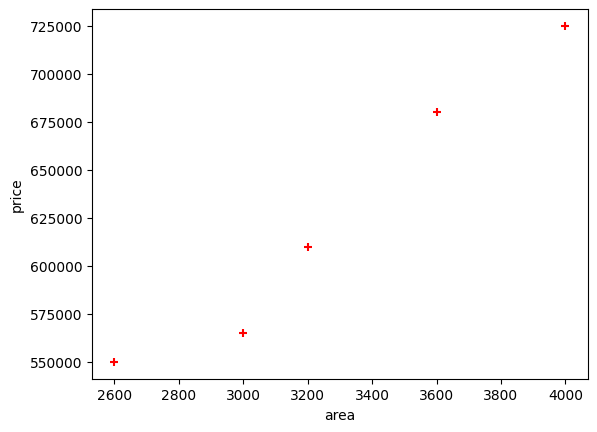

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('/content/housing_area_price.csv')
df

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

new_df = df.drop('price',axis='columns')
new_df

price = df.price
price

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

"""(1) Predict price of a home with area = 3300 sqr ft"""

reg.predict([[3300]])

reg.coef_

reg.intercept_

"""Y = m * X + b (m is coefficient and b is intercept)"""

3300*135.78767123 + 180616.43835616432

"""(1) Predict price of a home with area = 5000 sqr ft"""

reg.predict([[5000]])

Predict canada's per capita income in year 2020. Use the data
file canada_per_capita_income.csv file. If required, apply the
necessary data processing steps. Using this build a
regression model and predict the per capita income for
canadian citizens in year 2020

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np


file_path = '/content/canada_per_capita_income.csv'
df = pd.read_csv(file_path)

df.columns = ['year', 'per_capita_income']

# Splitting data into features (X) and target (y)
X = df[['year']]
y = df['per_capita_income']


model = LinearRegression()
model.fit(X, y)

# Predicting per capita income for the year 2020
predicted_income_2020 = model.predict(np.array([[2020]]))[0]
print(f"Predicted per capita income for 2020: ${predicted_income_2020:.2f} USD")


Predicted per capita income for 2020: $41288.69 USD


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predict Salary of the employee. Use the data file salary.csv
file. If required, apply the necessary data processing steps.
Using this build a regression model and predict the salary of
the employee with 12 years of experience.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np


salary_file_path = '/content/salary.csv'
salary_df = pd.read_csv(salary_file_path)

if salary_df.isnull().sum().sum() > 0:
    salary_df = salary_df.dropna()

X = salary_df[['YearsExperience']]
y = salary_df['Salary']

# Initializing the Linear Regression model
salary_model = LinearRegression()
salary_model.fit(X, y)
predicted_salary = salary_model.predict(np.array([[12]]))[0]


print(f"Predicted salary for 12 years of experience: ${predicted_salary:.2f}")


Predicted salary for 12 years of experience: $139049.67


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Considering the data file hiring.csv. The file contains hiring statics for a firm such as experience of
candidate, his written test score and personal interview score. Based on these 3 factors, HR will
decide the salary. Given this data, you need to build a Multiple Linear Regression model for HR
department that can help them decide salaries for future candidates. Using this predict salaries for
following candidates,



*   2 yr experience, 9 test score, 6 interview score
*   12 yr experience, 10 test score, 10 interview score





<ipython-input-7-14662822b531>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['test_score(out of 10)'].fillna(data['test_score(out of 10)'].mean(), inplace=True)


Predicted Salaries:
Candidate 1: $53290.89
Candidate 2: $92268.07


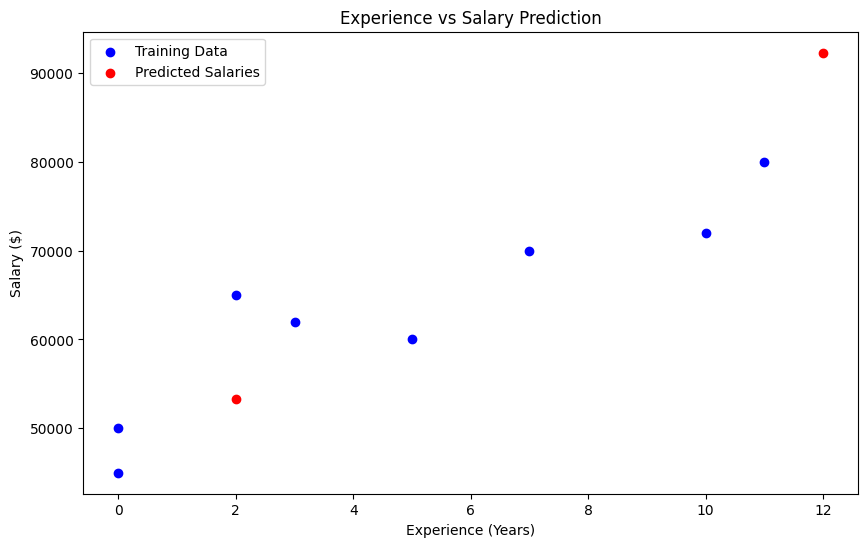

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


file_path = '/content/hiring.csv'
data = pd.read_csv(file_path)


experience_mapping = {
    'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4,
    'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9,
    'ten': 10, 'eleven': 11, 'twelve': 12
}

data['experience'] = data['experience'].apply(lambda x: experience_mapping.get(str(x).lower(), 0))
data['test_score(out of 10)'].fillna(data['test_score(out of 10)'].mean(), inplace=True)


X = data[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = data['salary($)']


model = LinearRegression()
model.fit(X, y)


test_candidates = pd.DataFrame([
    [2, 9, 6],
    [12, 10, 10]
], columns=['experience', 'test_score(out of 10)', 'interview_score(out of 10)'])


predicted_salaries = model.predict(test_candidates)
print("Predicted Salaries:")
for i, salary in enumerate(predicted_salaries, 1):
    print(f"Candidate {i}: ${salary:.2f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X['experience'], y, color='blue', label='Training Data')
plt.scatter(test_candidates['experience'], predicted_salaries, color='red', label='Predicted Salaries')
plt.title('Experience vs Salary Prediction')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')
plt.legend()
plt.show()


Considering the data file 1000_companies.csv. The file contains profit statics for a firm such as R&D
Spend, Administration, Marketing Spend and State. Based on these four factors build a Multiple
Linear Regression model to predict the profit. Using this predict profit for following,

*  91694.48 R&D Spend, 515841.3 Administration, 11931.24 Marketing Spend, Florida State

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

file_path = '/content/1000_Companies.csv'
data = pd.read_csv(file_path)

X = data[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = data['Profit']

column_transformer = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first'), ['State'])], remainder='passthrough')

X_encoded = column_transformer.fit_transform(X)

encoded_columns = column_transformer.transformers_[0][1].get_feature_names_out(['State'])
print("Encoded column names:", encoded_columns)

# Print the encoded data for the first few rows
print("Encoded Data (First 5 Rows):")
print(X_encoded[:5])


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)


model = LinearRegression()
model.fit(X_train, y_train)


test_data = np.array([[0, 0, 91694.48, 515841.3, 11931.24]])

# Predicting profit
predicted_profit = model.predict(test_data)
print(f"Predicted Profit for Florida: ${predicted_profit[0]:.2f}")


Encoded column names: ['State_Florida' 'State_New York']
Encoded Data (First 5 Rows):
[[0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05 4.7178410e+05]
 [0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05 4.4389853e+05]
 [1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05 4.0793454e+05]
 [0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05 3.8319962e+05]
 [1.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04 3.6616842e+05]]
Predicted Profit for Florida: $434037.12
